# Breast Cancer Wisconsin Prognostic
## Context
Data is from UCI Machine Learning Repository
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names 

## Content

1. Importing Libraries.
2. Exploration of Data.
3. Normalization of Data.
4. Modelling of Data.
5. Comparing Model Performance
6. Fitting Data to Final Model
7. Conclusion

## Objective
The main goal here is to fit a model to be able to predict whether breast cancer is at the malignant or benign stage based on 30 features and to which variable contributes the most.


### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # for creating dummy variables
from sklearn.preprocessing import MinMaxScaler # for normalising data

### 2.1 Importing Data

In [2]:
# Reading csv file into dataframe
df = pd.read_csv("BreastCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Explanation of variables

- ID number
- Diagnosis (M = malignant, B = benign)

The mean, standard error and “worst” (mean of the three largest values) of ten features were computed for each image, resulting in 30 features. Below is a list of the ten real-valued features computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension

### 2.2 Data cleaning

In [3]:
# Dropping id column
df1 = df.drop(columns="id")
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Total missing values for each feature
df1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

A summary of the statistical details of the features show that the means of the features varies widely and therefore we will have to normalise the data before modelling.

In [5]:
# summary of the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave_points_se          569 n

### 2.3 Data Visualization

In [6]:
#  some basic statistical details for all features
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


All variables except **diagnosis** are numeric variables.

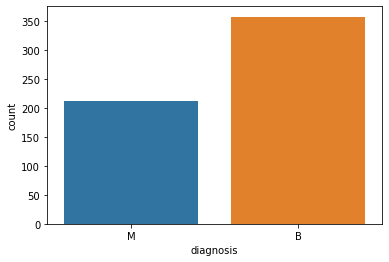

In [7]:
# Check the number of malignant(M) and benign(B) cases
sns.countplot(x="diagnosis", data=df1)

Iniatial visualisation to showed that patients who with malignant prognostics had higher radius, area, perimeter and smoothness mean as compared to those with benign prognostics.

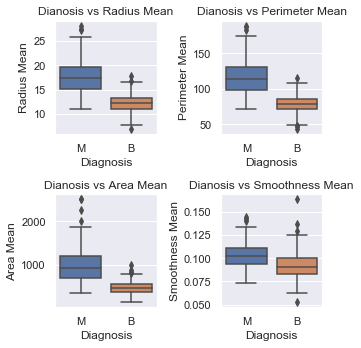

In [8]:
sns.set(rc={'figure.figsize':(5,5)})
plt.subplot(2, 2, 1)
sns.boxplot(x='diagnosis', y='radius_mean', data=df1)
plt.ylabel('Radius Mean')
plt.xlabel('Diagnosis')
plt.title('Dianosis vs Radius Mean')
plt.subplot(2, 2, 2)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df1)
plt.ylabel('Perimeter Mean')
plt.xlabel('Diagnosis')
plt.title('Dianosis vs Perimeter Mean')
plt.subplot(2, 2, 3)
sns.boxplot(x='diagnosis', y='area_mean', data=df1)
plt.ylabel('Area Mean')
plt.xlabel('Diagnosis')
plt.title('Dianosis vs Area Mean')
plt.subplot(2, 2, 4)
sns.boxplot(x='diagnosis', y='smoothness_mean', data=df1)
plt.ylabel('Smoothness Mean')
plt.xlabel('Diagnosis')
plt.title('Dianosis vs Smoothness Mean')
plt.tight_layout()
plt.show()

In [9]:
labels = ['radius_mean', 'perimeter_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',
       'texture_mean', 'symmetry_mean','diagnosis']


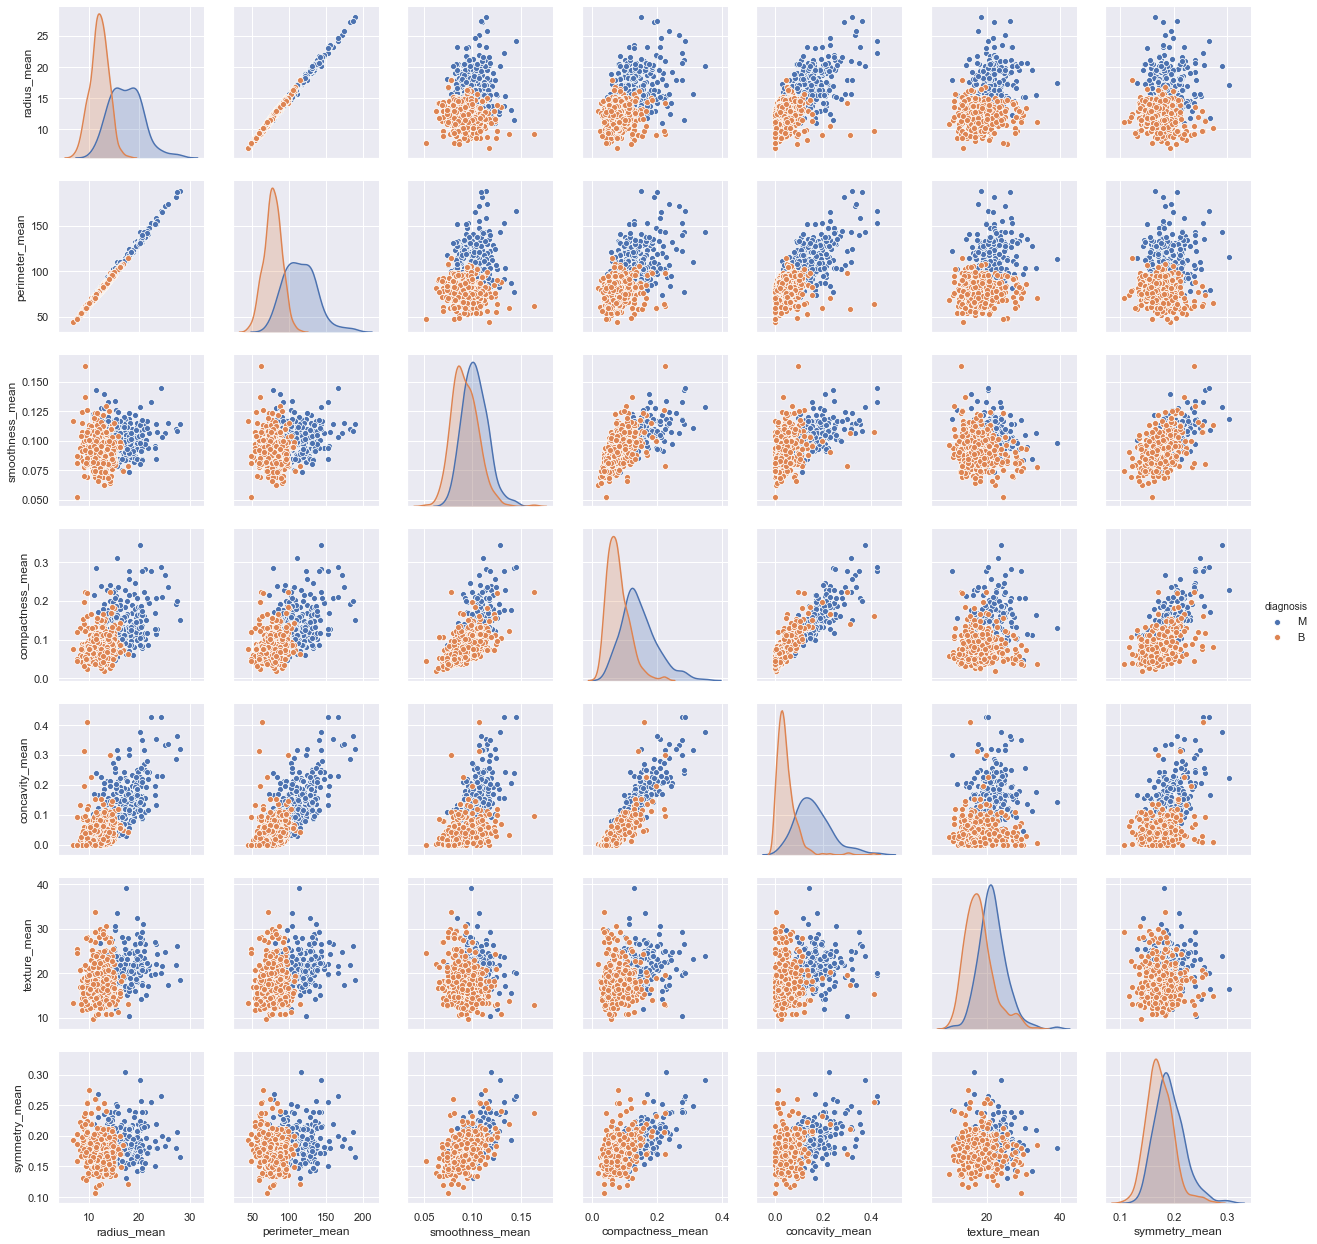

In [10]:
# let's examine how features determine prognostics
sns.pairplot(df1[labels], hue='diagnosis')
plt.show()

In [11]:
corr_matrix = round(df1.corr(), 2)

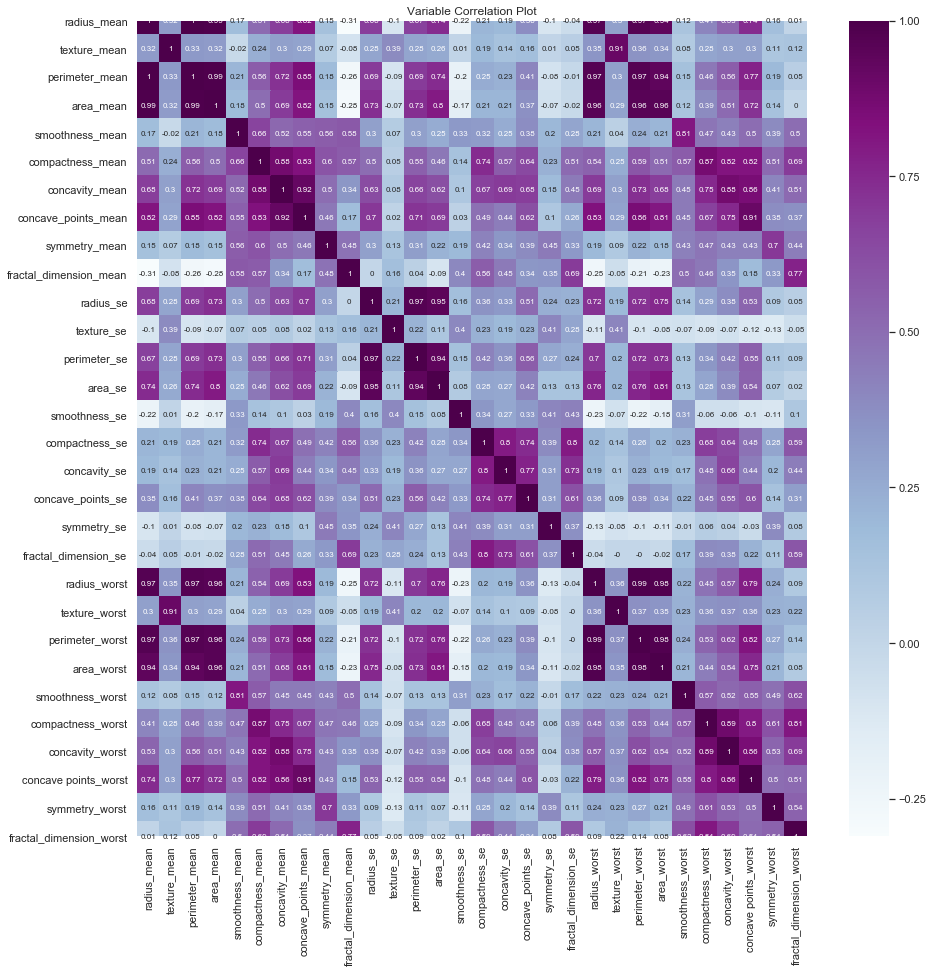

In [12]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr_matrix, cmap='BuPu', annot_kws={'size': 8}, cbar = True, annot=True)
plt.title('Variable Correlation Plot')
plt.show()

### 3. Normalising data

In [13]:
# dividing the data into X and Y
X=df1.iloc[:,1:31]
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
Y=df1.iloc[:,0:1]
Y.head(2)

,diagnosis
0,M
1,M


LabelEncoder is used to convert the categorical response into dummy variables.

In [15]:
le = LabelEncoder()

In [16]:
# converting diagnosis to dummy variables
Y['diagnosis_new'] = le.fit_transform(Y.diagnosis)
Y.head()
Y_new=Y.iloc[:,1:2]
Y_new.tail()

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,diagnosis_new
564,1
565,1
566,1
567,1
568,0


Due to the wide difference between the the means of the features, we will have to normalise the features for learning algorithm that computes the distance between the data points lke KNN. This includes all curve based algorithms. 

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X)
X1 = scaler.transform(X)
X_new=pd.DataFrame(X1, columns=X.columns)
X_new.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


The features are normalised now as shown in the statistics details below.

In [19]:
X_new.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.1 Importing libraries for fitting data

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score # This is for cross-validation
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, balanced_accuracy_score

### 4.2 Instantiating Models

In [21]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_new, Y_new, cv=10,  n_jobs=10)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


Text(0, 0.5, 'Cross-validated accuracy')

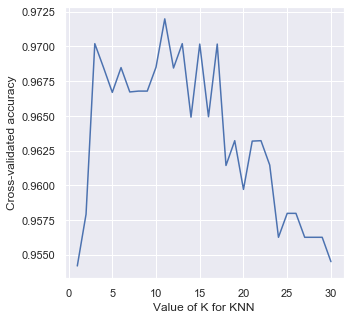

In [22]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
sns.set(rc={'figure.figsize':(5,5)})
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [23]:
#finding the best k
k_df = pd.DataFrame(k_scores, index=k_range)
best_kest = int(k_df.idxmax())
best_kest

11

In [24]:
knn = KNeighborsClassifier(n_neighbors=best_kest)

In [25]:
svm = SVC(random_state=100, C=1.0,
    kernel='linear',
    probability=True,
    ) 

In [26]:
logit = LogisticRegression(penalty='l2',
    tol=0.0001,
    random_state=10)

In [27]:
etc = ExtraTreesClassifier(n_estimators='warn',
    criterion='entropy',
    min_samples_split=3,
    min_samples_leaf=1,
    n_jobs=10,
    random_state=100,
    verbose=2
    )

In [28]:
bagging = BaggingClassifier(n_estimators=1000,
    n_jobs=10,
    random_state=100,
    verbose=0)

In [29]:
nb = GaussianNB()

In [30]:
rf = RandomForestClassifier(random_state=None)

### 4.3 Fitting Models

In [31]:
# Fitting models that does not require scaling
models_1 = [["DecisionTreeClassifier",etc],
         ["BaggingClassifier",bagging],
         ["GaussianNB",nb],
         ["RandomForestClassifier",rf]]

In [32]:
m_accuracy = []
for i in models_1:
    y_predict = cross_val_predict(i[1], X, Y_new, cv=10, n_jobs=10)
    ACC = round(accuracy_score(Y_new, y_predict), 2) 
    recall = round(recall_score(Y_new, y_predict, average='weighted'), 2) 
    B_ACC = round(balanced_accuracy_score(Y_new, y_predict), 2)
    Specificiti = round(2 * B_ACC - recall, 2)
    m_accuracy.append([i[0],ACC,recall,B_ACC,Specificiti])

In [33]:
# Fitting models that require scaling
models_2 = [["LogisticRegression",logit],
         ["SupportVector Machine",svm],
         ["KNeighborsClassifier",knn]]

In [34]:
for i in models_2:
    y_predict = cross_val_predict(i[1], X_new, Y_new, cv=10, n_jobs=10)
    ACC = round(accuracy_score(Y_new, y_predict), 2) 
    recall = round(recall_score(Y_new, y_predict, average='weighted'), 2) 
    B_ACC = round(balanced_accuracy_score(Y_new, y_predict), 2)
    Specificiti = round(2 * B_ACC - recall, 2)
    m_accuracy.append([i[0],ACC,recall,B_ACC,Specificiti]) 
    

### 5. Comapring model performance

In [35]:
performace_table = pd.DataFrame(m_accuracy)
performace_table.columns = ['Model','Accuracy', 'Recall','Bal. Accuracy','Specificity']
performace_table.style.bar(subset=["Accuracy",], color='#0d8ca6')\
                 .bar(subset=["Recall"], color='#50cce6')\
                 .bar(subset=["Bal. Accuracy"], color='#17990e')\
.bar(subset=["Specificity"], color='#6ed667')

,Model,Accuracy,Recall,Bal. Accuracy,Specificity
0,DecisionTreeClassifier,0.96,0.96,0.96,0.96
1,BaggingClassifier,0.96,0.96,0.96,0.96
2,GaussianNB,0.94,0.94,0.93,0.92
3,RandomForestClassifier,0.96,0.96,0.95,0.94
4,LogisticRegression,0.96,0.96,0.95,0.94
5,SupportVector Machine,0.98,0.98,0.97,0.96
6,KNeighborsClassifier,0.97,0.97,0.96,0.95


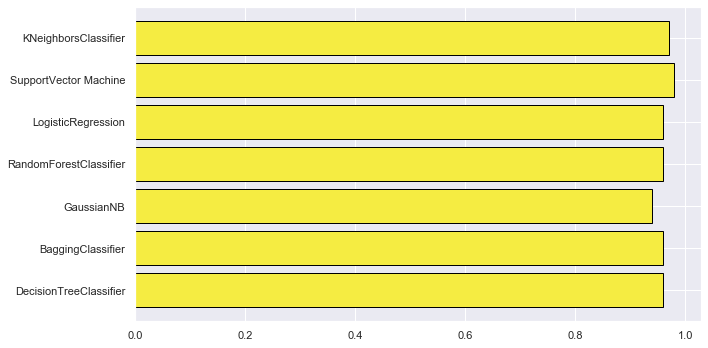

In [40]:
plt.figure(figsize=(10,5))
plt.barh(performace_table.Model, performace_table.Accuracy, color='#f5ec42', edgecolor='black')
plt.tight_layout()
plt.show()

In [46]:
# list of feature importance in desecending order
rf.fit(X, Y_new)
importance = pd.DataFrame(rf.feature_importances_, index=X_new.columns, columns=['FeatureImportance'])
importance.sort_values(by='FeatureImportance', ascending=False)

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


,FeatureImportance
area_mean,0.315369
area_worst,0.168320
concave points_worst,0.121405
area_se,0.074742
compactness_mean,0.048548
concavity_worst,0.029858
perimeter_mean,0.027894
perimeter_worst,0.022579
symmetry_worst,0.020631
smoothness_worst,0.018809


### 6.1 Fitting final model

In [42]:
# Now, try to train again with the full data
svm.fit(X_new,Y_new)

C:\Users\steve\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=100,
    shrinking=True, tol=0.001, verbose=False)

### 6.2 Saving final Model

In [43]:
# Python pickle module is used for serializing and de-serializing a Python object structure
import pickle

In [44]:
# Save the model
f1=open('breat_cancer_svm_model','wb') # wb => write binary
pickle.dump(svm, f1)

In [45]:
# better close (or flush) a file when done.
f1.close()